# Neural Network Classification with PyTorch
[Continued...]

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


print(torch.__version__)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

2.1.0+cu121
cpu


## 8. Putting it all together with a Multi-Class Classification Problem
- Binary Classification: one thing or another (cat vs dog, spam vs not soam, fraud or not fraud)
- Multi-class classification: more than opne thing or another (cat vs dog vs chicken)

### [Scikit-learn make_blobs datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [9]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2

# Create a toy multi-class dataset
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,   # give the clusters a little shake up
                            random_state = 42)

In [10]:
# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_blob[:10], y_blob[:10]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815],
         [-6.7941, -6.4772],
         [ 5.2102,  2.8890],
         [-5.5051, -6.3604],
         [-6.5438, -4.8339],
         [ 6.4496,  0.7478]]),
 tensor([3., 2., 2., 1., 1., 2., 1., 2., 2., 1.]))

In [11]:
# Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = 42)

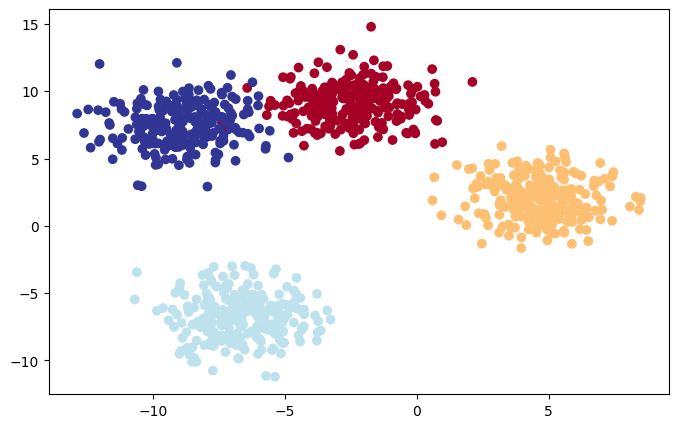

In [15]:
# Plot data
plt.figure(figsize=(8, 5))
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c = y_blob,
            cmap = plt.cm.RdYlBu);

### Building a Multi-class Classification Model

In [25]:
print(f'Input_features: {X_blob.shape}')

print(f'Unique output classes: {torch.unique(y_blob_train)}')
print(f'Output_features: {torch.unique(y_blob_train).shape}')

Input_features: torch.Size([1000, 2])
Unique output classes: tensor([0., 1., 2., 3.])
Output_features: torch.Size([4])


In [22]:
class blobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = input_features, out_features = output_features)
    )


  def foward(self, x):
    return self.linear_layer_stack(x)

# Instance of blobModel class
blob_model = blobModel(input_features = 2,
                       output_features = 4,
                       hidden_units = 16).to(device)

blob_model

blobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=2, out_features=4, bias=True)
  )
)